In [7]:
pip install resampy

In [8]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
print(os.getcwd())

/content


In [10]:
data_path = '/content/drive/MyDrive/DST'
print(os.listdir(data_path))

['val-20250924T074744Z-1-001.zip', 'test-20250924T075252Z-1-001.zip', 'train-20250924T075625Z-1-001.zip', 'test', 'val', 'train']


In [11]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

val-20250924T074744Z-1-001.zip
test-20250924T075252Z-1-001.zip
train-20250924T075625Z-1-001.zip
test
val
train


In [12]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [13]:
from pickle import dump
from pickle import load

In [14]:
train_data = data_path+"/train"
os.listdir(train_data)

['a_00000112_0.wav',
 'a_00000102_0.wav',
 'a_00000110_5000.wav',
 'a_00000128_0.wav',
 'a_00000115_0.wav',
 'a_00000106_0.wav',
 'a_00000131_0.wav',
 'a_00000103_5000.wav',
 'a_00000098_5000.wav',
 'a_00000134_5000.wav',
 'a_00000122_0.wav',
 'a_00000126_0.wav',
 'a_00000135_0.wav',
 'a_00000104_0.wav',
 'a_00000105_5000.wav',
 'a_00000111_0.wav',
 'a_00000111_5000.wav',
 'a_00000127_0.wav',
 'a_00000136_5000.wav',
 'a_00000095_5000.wav',
 'a_00000113_0.wav',
 'a_00000121_5000.wav',
 'a_00000123_0.wav',
 'a_00000109_0.wav',
 'a_00000120_5000.wav',
 'a_00000127_5000.wav',
 'a_00000116_5000.wav',
 'a_00000119_0.wav',
 'a_00000134_0.wav',
 'a_00000118_0.wav',
 'a_00000137_5000.wav',
 'a_00000119_5000.wav',
 'a_00000101_5000.wav',
 'a_00000121_0.wav',
 'a_00000136_0.wav',
 'a_00000113_5000.wav',
 'a_00000109_5000.wav',
 'a_00000129_0.wav',
 'a_00000132_5000.wav',
 'a_00000107_5000.wav',
 'a_00000114_5000.wav',
 'a_00000117_0.wav',
 'a_00000107_0.wav',
 'a_00000112_5000.wav',
 'a_00000118_

In [15]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000130_5000.wav',
 'a_00000114_0.wav',
 'a_00000042_5000.wav',
 'a_00000117_5000.wav',
 'a_00000053_0.wav',
 'n_00000363_5000.wav',
 'a_00000102_5000.wav',
 'a_00000096_5000.wav',
 'a_00000093_5000.wav',
 'a_00000058_0.wav',
 'a_00000001_0.wav',
 'a_00000012_0.wav',
 'a_00000003_0.wav',
 'a_00000031_5000.wav',
 'a_00000125_0.wav',
 'a_00000072_0.wav',
 'n_00000370_0.wav',
 'a_00000036_0.wav',
 'a_00000115_5000.wav',
 'a_00000041_5000.wav',
 'a_00000018_5000.wav',
 'a_00000016_0.wav',
 'a_00000129_5000.wav',
 'a_00000024_0.wav',
 'a_00000013_5000.wav',
 'a_00000135_5000.wav',
 'a_00000022_0.wav',
 'a_00000074_5000.wav',
 'a_00000062_0.wav',
 'n_00000341_5000.wav',
 'a_00000123_5000.wav',
 'a_00000106_5000.wav',
 'a_00000120_0.wav',
 'a_00000047_5000.wav',
 'a_00000035_5000.wav',
 'a_00000088_0.wav',
 'a_00000045_0.wav',
 'a_00000032_5000.wav',
 'a_00000010_0.wav',
 'a_00000007_0.wav',
 'a_00000008_5000.wav',
 'n_00000376_0.wav',
 'a_00000100_5000.wav',
 'a_00000116_0.wav',
 'n_000

In [16]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000078_5000.wav',
 'a_00000122_5000.wav',
 'a_00000066_0.wav',
 'a_00000133_0.wav',
 'a_00000099_5000.wav',
 'a_00000100_0.wav',
 'a_00000124_5000.wav',
 'a_00000087_0.wav',
 'a_00000101_0.wav',
 'a_00000067_5000.wav',
 'a_00000083_0.wav',
 'a_00000065_0.wav',
 'a_00000076_0.wav',
 'a_00000094_5000.wav',
 'a_00000080_0.wav',
 'a_00000105_0.wav',
 'a_00000088_5000.wav',
 'a_00000125_5000.wav',
 'a_00000073_0.wav',
 'a_00000090_0.wav',
 'a_00000126_5000.wav',
 'a_00000124_0.wav',
 'a_00000098_0.wav',
 'a_00000075_0.wav',
 'a_00000074_0.wav',
 'a_00000068_0.wav',
 'a_00000091_0.wav',
 'a_00000137_0.wav',
 'n_00000329_0.wav',
 'n_00000369_0.wav',
 'a_00000019_0.wav',
 'a_00000027_0.wav',
 'a_00000043_0.wav',
 'a_00000001_5000.wav',
 'n_00000371_0.wav',
 'a_00000023_5000.wav',
 'n_00000309_5000.wav',
 'n_00000338_5000.wav',
 'a_00000033_0.wav',
 'a_00000011_5000.wav',
 'n_00000324_0.wav',
 'a_00000085_5000.wav',
 'a_00000099_0.wav',
 'n_00000377_5000.wav',
 'n_00000323_5000.wav',
 'a_

In [17]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [18]:
normal_train

'/content/drive/MyDrive/DST/train/n_*.wav'

In [19]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [20]:
import librosa
import librosa.display

In [21]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [22]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [23]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [24]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [25]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [26]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [27]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [28]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [29]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

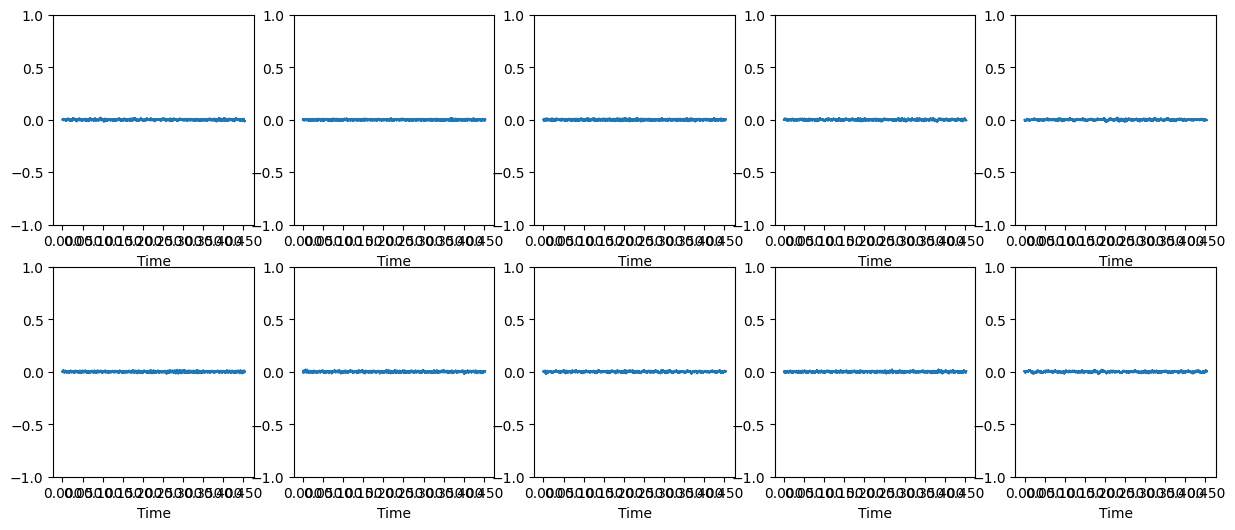

In [30]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

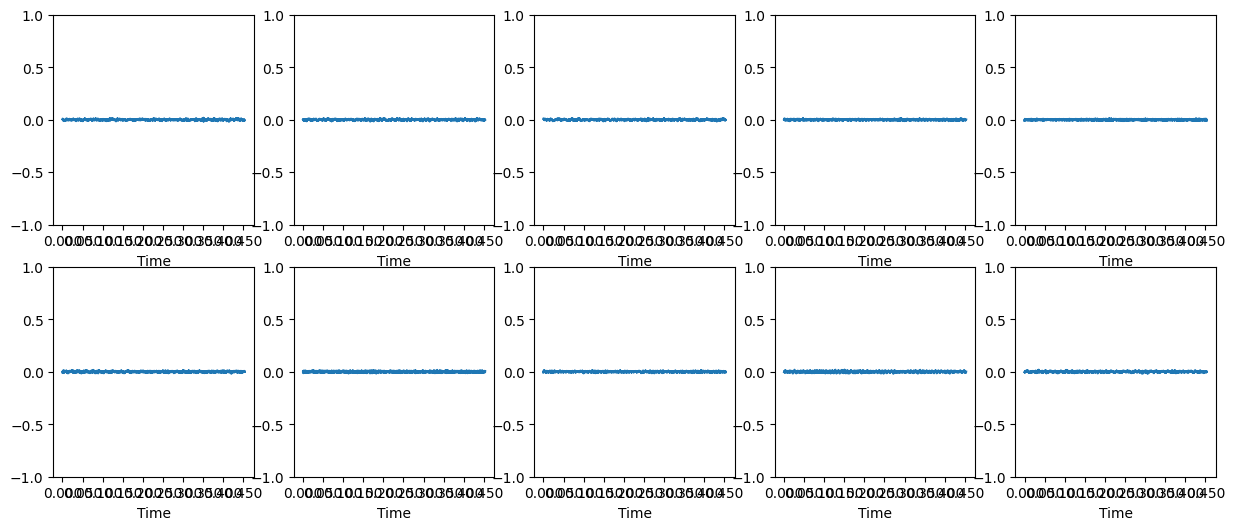

In [31]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [32]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [33]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [34]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [35]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [36]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[5.02929688e-02 2.07469638e+03]
[4.34570312e-02 1.52789564e+03]
[3.22265625e-02 1.68315815e+03]
[2.97851562e-02 1.11462782e+03]


Text(0, 0.5, 'Count')

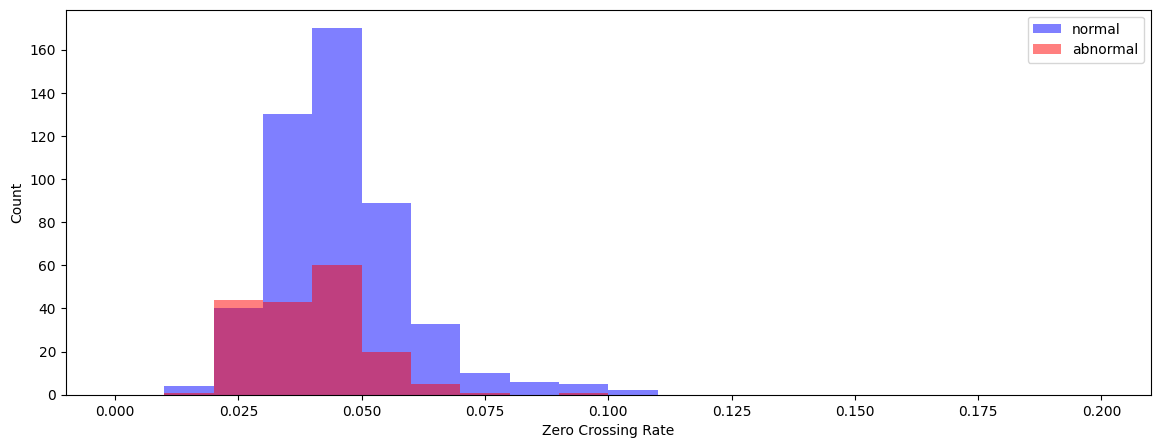

In [37]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

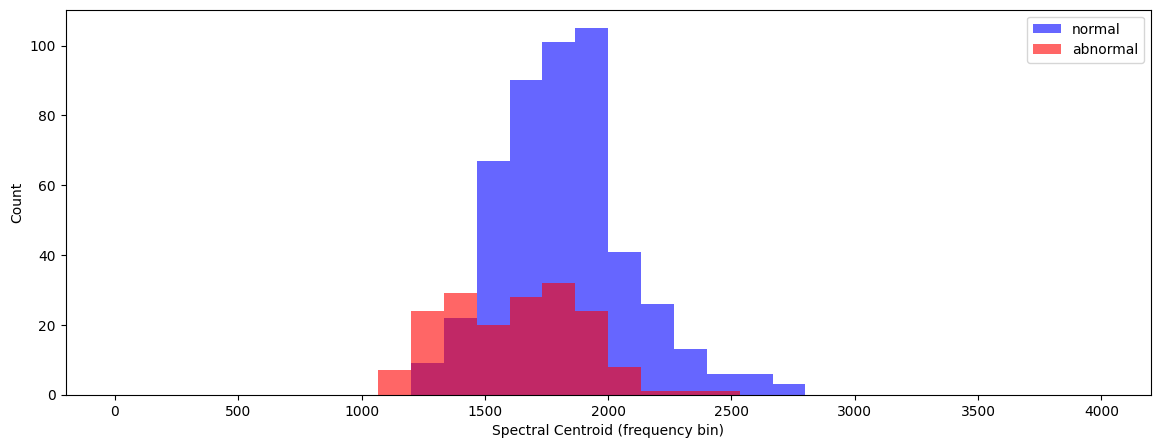

In [38]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [39]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [40]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [41]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [42]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

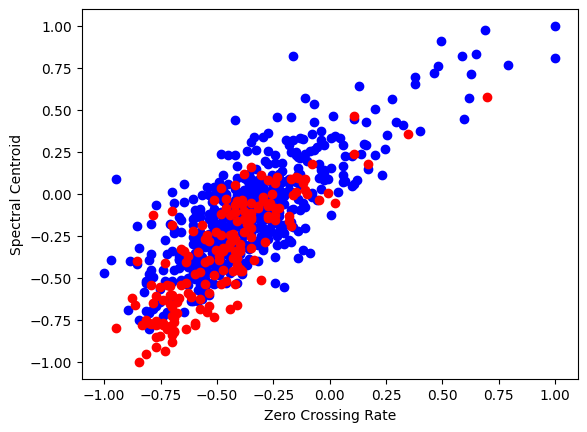

In [43]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [44]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [45]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [46]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [48]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [49]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [51]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [52]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5001 - loss: 0.7209 - val_accuracy: 0.4398 - val_loss: 0.7425
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5300 - loss: 0.7307 - val_accuracy: 0.5301 - val_loss: 0.7204
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5953 - loss: 0.7042 - val_accuracy: 0.5663 - val_loss: 0.7049
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6901 - loss: 0.6748 - val_accuracy: 0.6024 - val_loss: 0.6940
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6924 - loss: 0.6612 - val_accuracy: 0.6446 - val_loss: 0.6841
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6921 - loss: 0.6628 - val_accuracy: 0.6867 - val_loss: 0.6757
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7236 - loss: 0.6492 - val_accuracy: 0.6988 - val_loss: 0.6687
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7306 - loss: 0.6323 - val_accu

In [54]:
import plotly
import plotly.graph_objs as go

In [55]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [56]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [60]:
file_name = '/content/drive/MyDrive/DST/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


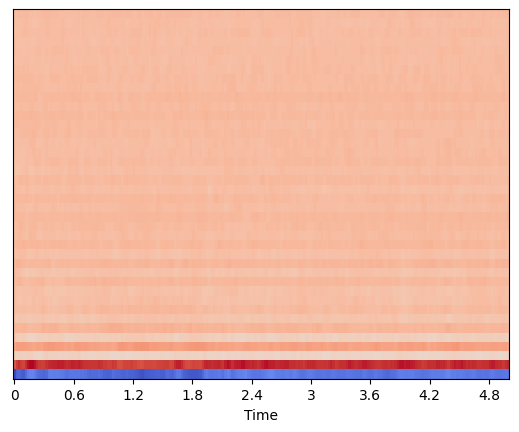

In [61]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [62]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [63]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [64]:
normal_train_features[0].shape

(40, 216)

In [65]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [66]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [67]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [68]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [69]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [70]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [71]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [72]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [73]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [74]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [75]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [76]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.5008 - loss: 18.7924
Epoch 1: val_loss improved from inf to 1.81301, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 630ms/step - accuracy: 0.5123 - loss: 18.4055 - val_accuracy: 0.7169 - val_loss: 1.8130
Epoch 2/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7029 - loss: 2.1525 
Epoch 2: val_loss improved from 1.81301 to 0.67112, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6359 - loss: 2.1213 - val_accuracy: 0.7169 - val_loss: 0.6711
Epoch 3/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7325 - loss: 1.7101 
Epoch 3: val_loss did not improve from 0.67112
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7310 - loss: 1.5336 - val_accuracy: 0.2831 - val_loss: 1.0888
Epoch 4/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5677 - loss: 0.9953 
Epoch 4: val_loss improved from 0.67112 to 0.66223, saving model to best_model.keras
11/11 ━━━

In [77]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [78]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [79]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [80]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.2080, acc: 0.9428
Validation- loss: 0.2116, acc: 0.9337


In [81]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [82]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118   1]
 [ 10  37]]


In [83]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9219    0.9916    0.9555       119
    abnormal     0.9737    0.7872    0.8706        47

    accuracy                         0.9337       166
   macro avg     0.9478    0.8894    0.9130       166
weighted avg     0.9365    0.9337    0.9314       166



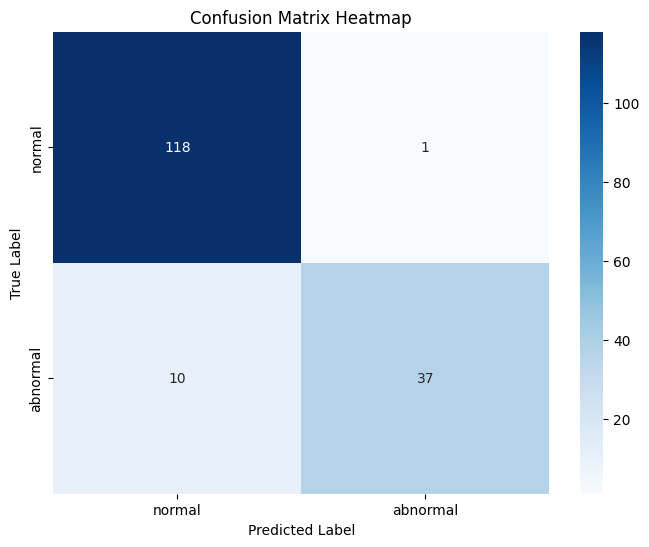

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

#Lab week8

In [85]:
file_name = '/content/drive/MyDrive/DST/test/a_00000011_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


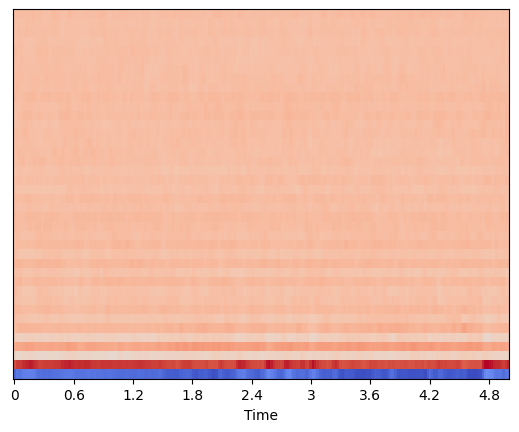

In [86]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [87]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [88]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [89]:
normal_train_features[0].shape

(40, 216)

In [90]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [91]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [92]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [93]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [94]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [95]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [96]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [97]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [98]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [99]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [100]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [101]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.6287 - loss: 6.0794
Epoch 1: val_loss improved from inf to 1.44469, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 651ms/step - accuracy: 0.6263 - loss: 5.9919 - val_accuracy: 0.7169 - val_loss: 1.4447
Epoch 2/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6597 - loss: 2.0719
Epoch 2: val_loss improved from 1.44469 to 0.49470, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6611 - loss: 1.9928 - val_accuracy: 0.9036 - val_loss: 0.4947
Epoch 3/50
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6133 - loss: 1.5102
Epoch 3: val_loss improved from 0.49470 to 0.47137, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6220 - loss: 1.4737 - val_accuracy: 0.9036 - val_loss: 0.4714
Epoch 4/50
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6752 - loss: 0.9625
Epoch 4: val_loss improved from 0.47137 to 0.35553, saving

In [102]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [103]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [104]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [105]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.1366, acc: 0.9563
Validation- loss: 0.1523, acc: 0.9518


In [106]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


In [107]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118   1]
 [  7  40]]


In [108]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9440    0.9916    0.9672       119
    abnormal     0.9756    0.8511    0.9091        47

    accuracy                         0.9518       166
   macro avg     0.9598    0.9213    0.9382       166
weighted avg     0.9529    0.9518    0.9508       166



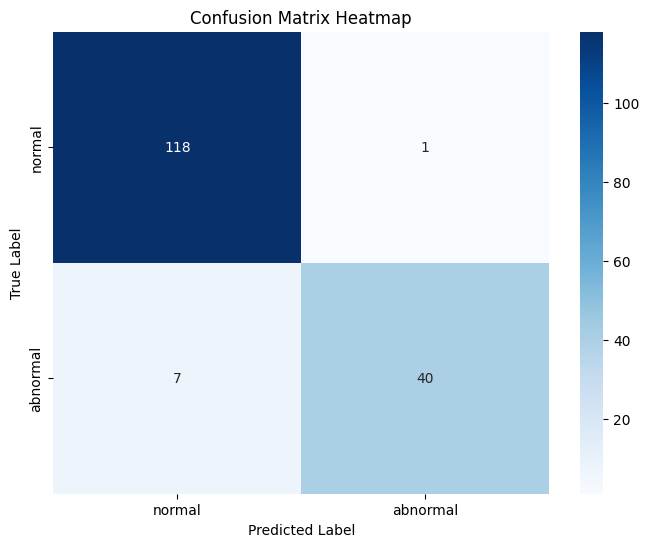

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()